In [1]:
!pip install tensorflow-gpu

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.8.0


In [4]:
df0 = pd.read_csv('Churn_Modelling.csv')
df0.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = df0.iloc[:,3:13]
y = df0.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first= True)

In [9]:
X = X.drop(['Geography','Gender'], axis=1)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [11]:
X = pd.concat([X,geography, gender], axis=1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [15]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [16]:
X_train.shape

(8000, 11)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU, PReLU, ELU, LeakyReLU
from tensorflow.keras.layers import Dropout

In [18]:
#ANN
classifier = Sequential()

In [19]:
## Adding input layer
classifier.add(Dense(units = 11, activation = 'relu'))

In [20]:
classifier.add(Dropout(0.4))

In [21]:
## Adding first Hidden Layer
classifier.add(Dense(units = 8, activation = 'relu'))

In [22]:
classifier.add(Dropout(0.5))

In [23]:
## Adding Second Hidden Layer
classifier.add(Dense(units = 6, activation = 'relu'))

In [24]:
## Adding output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [25]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
## For customized learning rate of adam optimiser 
# import tensorflow
# opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [27]:
print(np.array(X_train).shape)
print(np.array(y_train).shape)

(8000, 11)
(8000,)


In [28]:
# Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [29]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33,batch_size = 10,epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 2ms/step - loss: 0.6072 - accuracy: 0.7384 - val_loss: 0.5135 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.5075 - accuracy: 0.7955 - val_loss: 0.4895 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4925 - accuracy: 0.7968 - val_loss: 0.4744 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4816 - accuracy: 0.7955 - val_loss: 0.4610 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4663 - accuracy: 0.7962 - val_loss: 0.4446 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4574 - accuracy: 0.8046 - val_loss: 0.4336 - val_accuracy: 0.7959
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4501 - accuracy: 0.8074 - val_loss: 0.4289 - val_accuracy:

In [30]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

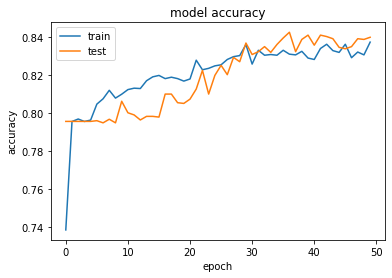

In [31]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

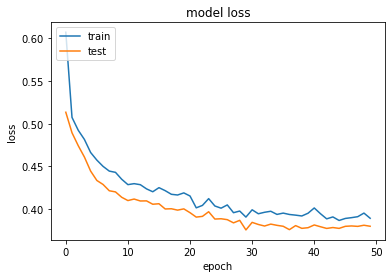

In [32]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
## Predicting the test
y_pred = classifier.predict(X_test)
y_pred = (y_pred >=0.5)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1572,   23],
       [ 264,  141]], dtype=int64)

In [35]:
## Calculate Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [36]:
score

0.8565

In [37]:
## Get the weights
classifier.get_weights()

[array([[-5.18380851e-02, -3.05965580e-02, -1.08280621e-01,
          1.22604877e-01,  1.48313209e-01, -3.47089879e-02,
         -8.81121755e-02,  5.44330366e-02,  7.88690336e-03,
         -5.29114939e-02,  2.17612442e-02],
        [ 1.53381169e-01,  1.73027650e-01,  2.10986882e-01,
         -6.16578996e-01, -9.89320993e-01, -7.45079935e-01,
          2.65866101e-01,  2.77258545e-01,  3.96031588e-01,
          2.48353407e-01,  1.98425576e-01],
        [ 1.02485819e-02,  2.23292373e-02, -1.18659632e-02,
          1.02336798e-02, -2.12334879e-02,  5.16654924e-02,
          6.16499186e-02, -5.75604625e-02, -9.98421460e-02,
          2.65207551e-02,  1.75708160e-01],
        [ 1.05334580e-01,  8.38873759e-02, -6.53845787e-01,
         -2.97196716e-01, -2.62774438e-01, -2.79967517e-01,
         -5.68346024e-01,  4.73764151e-01,  1.26934886e-01,
         -2.96376258e-01, -3.47698390e-01],
        [ 8.72491121e-01,  8.75511527e-01, -8.66242349e-01,
          4.87357154e-02,  4.97310102e-05,  